# Completion Histogram
## ENGR 102 COCC
### Bruce Emerson 3/3/2025

This notebook is meant to generate the data representation I need for an A3 problem solving activity in class.

[Week 9 Content](https://github.com/smithrockmaker/ENGR102/blob/main/Classroom/Week9Content.md) 

What I'm trying to represent here is the distribution of completion times for students in the class. What can we do to improve self starting and earlier completion of activities.

## Dependencies

As we talked about previously there are a number of what are called libraries that allow us to add tools to our notebooks. These libraries only need to be accessed once in a given notebook. The general approach is to load any needed tools at the begining of the notebook. These libraries themselve use other libraries which are called dependencies. This is how we load the various libraries of python tools that are needed for the particular work we are undertaking. 

To access commands from these libraries we have to type the entire name of the library which is often aggravating and time consuming. More typically we give the imported library an "alias' which is a shorthand for the long library name. The language to bring the library onboard and to give it an alias is ```import [library] as [alias]```.
  
```numpy``` is a numerical tools library - often imported as np. ```numpy``` also contains the statistical tools that we will use in this lab. There are other libraries dedicated to statistical tools but 'numpy' has everything we need.  
```matplotlib```is a 'MATLAB like' library. 
```matplotlib.pyplot``` is often imported as ```plt``` to make it easier to use. ```matplotlib``` has the plotting tools that we need for this lab.  

The following code cell will need to be run first before any other code cells. This sometimes takes a while because a lot of code is being loaded during this process.

In [2]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


## Lists (Vectors)

We usually talk about our data as a list of data points. In spreadsheets we enter data in a set of successive cells in a column or a row. There is a creature in python called a list which is a way of accomplishing a similar task.  

[python documentation: list](https://docs.python.org/3.7/tutorial/datastructures.html) This link to the python documentation for lists will bury you in features and uses of lists. It is easy and common to overwhelmed by the deluge of information which is why these notebooks are created. I include this reference link so you could explore more deeply if you have time to do so but what you actually need to understand for this lab is contained within this notebook.

Our lists need names so we can work with them later on. As we have disucssed it is best practice to use names that have relevant meaning. Note the square brackets and the comma as a separator between data points. The data here is made up so you will surely replace it with your data!

#### This Data:

The raw data is encoded with the month followed by the day. 125 is Jan 25. This makes it easy to enter the data. It will make it tougher to histogram because of the inconsistency in the numerical values. I will have to work this out later.


In [62]:
data1 = [122,127,126,127,400,117,122,124,204,118,118,122,120,127,203,122,123,400,126,400,400,216,210,226,126,225]
data1due = 120
# 2 ways to print out and check your data
print(data1)
print("Data set:",data1)

[122, 127, 126, 127, 400, 117, 122, 124, 204, 118, 118, 122, 120, 127, 203, 122, 123, 400, 126, 400, 400, 216, 210, 226, 126, 225]
Data set: [122, 127, 126, 127, 400, 117, 122, 124, 204, 118, 118, 122, 120, 127, 203, 122, 123, 400, 126, 400, 400, 216, 210, 226, 126, 225]


In [64]:
daysLate = data1

for i in range(0, len(data1)-1):
    daysLate[i] = data1[i]-data1due
    print ('before:', daysLate[i])
    if daysLate[i] > 31:
        daysLate[i] = daysLate[i]- 69


print(daysLate)


before: 2
before: 7
before: 6
before: 7
before: 280
before: -3
before: 2
before: 4
before: 84
before: -2
before: -2
before: 2
before: 0
before: 7
before: 83
before: 2
before: 3
before: 280
before: 6
before: 280
before: 280
before: 96
before: 90
before: 106
before: 6
[2, 7, 6, 7, 211, -3, 2, 4, 15, -2, -2, 2, 0, 7, 14, 2, 3, 211, 6, 211, 211, 27, 21, 37, 6, 225]


## Check data points

There are various ways you might choose to check your data points. You can look through the list above or you can ask python to count how many data points for you as shown below. Check that the number of data points matches your expectation. In the long run we will use this technique to be sure we have the same number of x data points as y data points when we make plots.

In [10]:
data1length = len(data1)
#data2length = len(data2)
# length counts how many 'data points' in the list
print("number of data points (1):", data1length)
#print("number of data points (2):", data2length)

number of data points (1): 26


## Basic Histogram

From a structural point of view the plt.hist command creates the histogram which is displayed using the plt.show() command. THis is how many coding languages work. The code creates objects, in this case the histogram, and then there is a command that displays the object that is created. I don't want you to get down in the weeds about how that works this week. We will slowly move in that direction. As the plt.hist command generates the plot it also returns three bits of information - the heights of each bin (array), the edges of each bin (array), and the patch objects that are the bars that are plotted. For now we can ignore these information items that are returned from the ```plt.hist``` command. 

[matplotlib.pyplot.hist](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)  


## Histogram Styles

In the ```plt.hist``` command there are a number of arguments that can be provided to control the features of the histogram that is produced. In the code I have broken each argument out onto an individual line to make them more clear. 
```
height, bins, patches = plt.hist(data1,
                                 num_bins,
                                 fullrange,
                                 histtype = "barstacked",
                                 color="tab:blue",
                                 alpha= .7
                                )
```

```data1``` is the name of the data list (vector) I want to generate the data from.  

```num_bins``` is an integer that tells the command how many different divisions I want across the possible value of my histogram. You will explore different values for num_bins to understand the impact of this argument on the how the histogram looks.

```fullrange``` is a sort vector [x_low,x_high] that defines the upper and lower bounds of your histogram. Notice you can leave space around the histogram or end up packing everything into the edges. 

```histtype = "barstacked"``` tells the command what style
The other options for 'histtype' are "barstacked", "step", and "stepfilled". The "stepfilled" style solves some of the consideration discussed above.

```color="tab:blue"``` allows us to choose the color for the histogram. In case you want to play here are the available colors--

[plot colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

```alpha= .7``` sets the density of the color plot. 0 is totally transparent and 1. is totally opaque. 


***
## Lab Deliverable:

Play with the arguments for the histogram until you feel like you have some comfort with them. Be sure to do your playing in a copy of the lab because of the possibility that you will make some seemingly insignificant change that will keep it from working. Being able to go back to the original and copy-paste to get back to the original code seems important. We won't use histograms a lot in this class but this is a good time to experiment with getting comfortable 'messing around' in the python code. Try to generate a sense of confidence that you can recover if something goes horribly wrong.
***

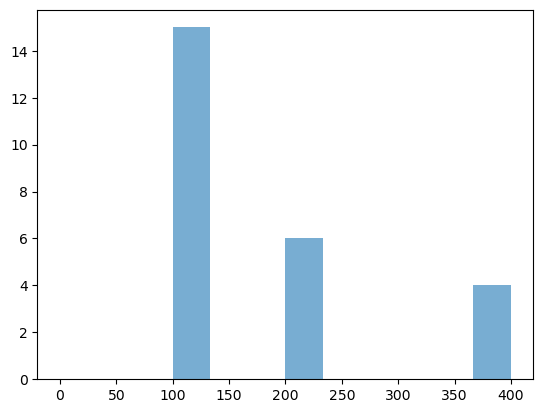

In [14]:
# choose how many bins you want to display
# ...also set the histogram type in the arguments
# Just data1 in this histogram
num_bins = 12
fullrange = [0,400]
height, bins, patches = plt.hist(data1,
                                 num_bins,
                                 fullrange,
                                 histtype = "barstacked",
                                 color="tab:blue",
                                 alpha= .6
                                )
plt.show()

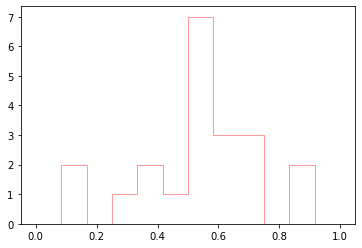

In [8]:
# choose how many bins you want to display
# ...also set the histogram type in the arguments
# Just data2 in this histogram, also changed type of histogram
num_bins = 12
fullrange = [0,1]
height, bins, patches = plt.hist(data2,
                                 num_bins,
                                 fullrange,
                                 histtype = "step",
                                 color="red",
                                 alpha= .4
                                )
plt.show()

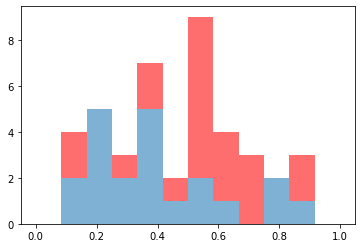

In [9]:
# choose how many bins you want to display
# ...also set the histogram type in the arguments
# Just both data1 and data2 in this histogram, also changed type of histogram
num_bins = 12
fullrange = [0,1]
height, bins, patches = plt.hist([data1,data2],
                                 num_bins,
                                 fullrange,
                                 histtype = "barstacked",
                                 color=["tab:blue","red"],
                                 alpha= .57
                                )
plt.show()

***
## Lab Deliverable:

Now produce 3 histograms of our actual data (practice with this data but in the end it's our class data) that demonstrate your understanding of the 'Goldilocks Triplet'. One with too few bins to be meaningful, one with too many, and one that is 'just right'. Describe, in your own words, how you understand this triplet.
***

***
## Lab Deliverable:

### Analysis I

Where is your personal data point in the histogram of the data (don't worry about plotting it just describe). Is 'your' data point consistent with other members of your group? Could you be easily confused with members of the other group? 
***

### In Case You're Curious....**NOT REQUIRED!**

Many times I will include in the lab notebook examples of enhanced tools that go way beyond what I expect for the lab. If you have a coding background or you're just curious you can look through these examples to get a sense of some additional options. To be clear, there are truly remarkable things you can do in python plots with pyplot and the other tools in ```matplotlib```. The link below takes you to the ```matplotlib``` example gallery which is overwhelming.

[Matplotlib](https://matplotlib.org/3.1.1/gallery/index.html)

#### This Example:

**Assign a color name:** 

As I make the plot more complex I will want to use the same color for everything associated with data set 1 and a different color for data set 2. In each plot element I will have to tell the plotting code what color to use. If I then change the color I have to go manually change it in multiple lines of code. That's aggravating. It's much easier to create a variable that 'holds' the color that I want. For those who are new to coding this sort of variable is called a ```string``` variable because it contains a string of characters. To define a string variable (simplest way) set the variable equal to some set of characters within quotes. Python will automatically assume that you intend for the variable to be a string of characters. 
```
data1Color = "tab:blue"
data2Color = "tab:red"
```
**Create a Figure with option for multiple plots**

```figHist, axHist = plt.subplots()```

This command does two things. It creates a overall object called a figure that contains all the plots I want to make. Within that figure are a number of axes objects which are the individual plots within the figure. If I have just one plot I create just one set of axes. In this case the figure is called figHist and the only 'plot' is called axHist.

**Create a vertical line to indicate the mean:**

We could certainly create a vertical line as a function but it's a common enough need that pyplot has a built in function to do this called, remarkably, ```vlines```. Here is the format and the meaning of the arguments.

```
axHist.vlines(data1mean,
              0,
              10,
              color = data1Color,
              linestyle = '-',
              linewidth = 2.,
              label = "data1 mean")
axHist.vlines(data2mean,
```
argument 1: data1mean -- 'x' value where I want the vertical line placed -- the data1mean in this case
arg2, arg3: minimum and maximum y values for the vertical line. In this case from 0 to 10. 
color, linestyle, linewidth, and label are standard style arguments that are similar in all pyplot commands.

**Size of the Figure:**

```figHist.set_size_inches(10, 9)```

This command to the figure sets the physical size of the plot in inches. Amusingly or irritatingly, there is no direct metric equivalent such as set_size_cm. This allows me to control the size of the plot for visibility.

**Show Grid Lines**

```axHist.grid()```

For each plot object you can choose to show the grid associated with your axis variables this can make it easier to see what the values are on the plot. I'm sure that are some interesting effects that I can get with the arguments for the grid command but I haven't explored them yet.

**Legend**

```plt.legend(loc=1)```

The legend is a helpful tool for reminding the viewer which color or line represents what feature of your data. There are many options here but the only one I am using at the moment is the loc (location) argument. This tells pyplot where I want the legend to be placed on the plot. Mostly pyplot does pretty good putting it out of the way by default but if you need to control the location try changing the 1 (1 = top right) to other values. loc must be an integer from 1 to 9.

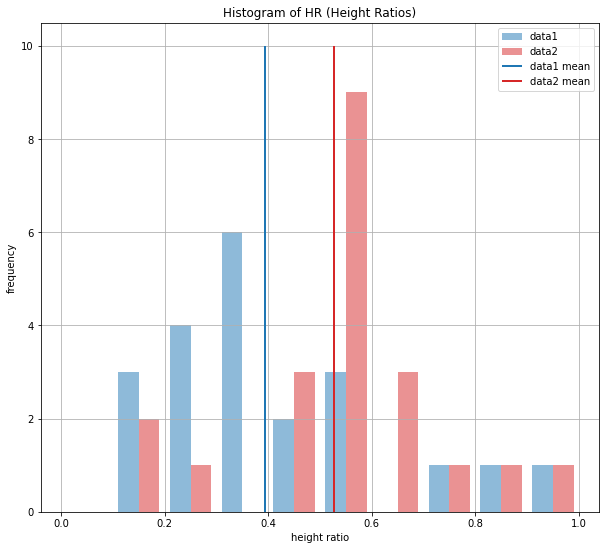

In [10]:
# Choose my number of bins and the range of the histogram again.
num_bins = 10
fullrange = [0,1]

# Assign particular colors to each data set
data1Color = "tab:blue"
data2Color = "tab:red"

# Explicitly create a figure with a particular plot 'axHist' contained within the figure
figHist, axHist = plt.subplots()
height, bins, patches = axHist.hist([data1,data2],
                                 num_bins,
                                 fullrange,
                                 histtype = "bar",
                                 color=[data1Color,data2Color],
                                 alpha= .5,
                                 label=['data1','data2'])

# Reminder -- we have already determined data1mean and data2mean
# see previous cell for description of arguments.

axHist.vlines(data1mean,
              0,
              10,
              color = data1Color,
              linestyle = '-',
              linewidth = 2.,
              label = "data1 mean")
axHist.vlines(data2mean,
              0,
              10,
              color = data2Color,
              linestyle = '-',
              linewidth = 2.,
              label = "data2 mean")

# Set the size of my plot for better visibility
figHist.set_size_inches(10, 9)

# turn on grid lines to help interpretation
axHist.grid()

# Label the figure
plt.xlabel('height ratio')
plt.ylabel('frequency')
plt.title('Histogram of HR (Height Ratios)')

# show a legend for what the different parts of the plot mean. The legend grabs the 'lable'
# from each plot command to create this
plt.legend(loc=1)
plt.show()

### The Meaning of Standard Deviation:

The standard deviation gets tossed around a lot and my experience is that most of us have a shakey understanding of what it means about the data. data1 has an average of .39 and a standard deviation of .22 while data2 has an average of .53 and a standard deviation of .20. This is for the data presented in my original Data and Meaning Lab Notebook. The histogram of both of these data sets is two plots above this cell. You can see a clear sense in the data that the blue data is more to the left and the red data is more to the right. This is confirmed in the math by the averages of .39 and .53 respectively. We could be tempted to argue that this is a distinct difference between the data sets and therefore they represent some real difference. This would be an unfortunate misunderstanding of the data and the standard deviation.

#### $\pm$ 1 Standard Deviation ($\sigma$):

For normal data that isn't skewed by sytematic errors the expectation is that roughly 2/3 of the data lies within 1 standard deviation of the mean. This is usually called $\pm 1 \sigma$ where $\sigma$ is the traditional symbol for the standard deviation. In a probablility sense this can be interpreted to mean that 2 out of 3 times the true value of the measurement that we would find after many measurements and increased precision would fall somewhere within $\pm 1 \sigma$ of the mean. Notice that this also means there is a 33% chance that the actual value of the measurement is **MORE** than $\pm 1 \sigma$ from the mean. 

For this data you would say that that it likely that the actual value of the blue data is someplace between .39-.22 = .17 and .39 + .22 = .61 or \[.17,.61\]. This means it's a reasonable possibility that the actual value of the blue data is the same as the average of the red data. Similarly the reasonable range of the red data is \[.33, .73\] which suggest similar ambiguity about the red data. What we say is that the $\pm 1 \sigma$ ranges of both data sets overlap and therefore they might represent the same data even though their averages are noticeably different.

#### In Real Engineering/Science

In real life we don't argue that two measurements are different unless they do **NOT** overlap at the $\pm 3 \sigma$ points and for seriously important safety stuff we often require $\pm 5 \sigma$ or $\pm 7 \sigma$ clarity. To distinguish effects at these levels we have to lay close attention to the precision and the repeatability of our measurements. This is where the general sense that science has to be precise comes from. The reality is more complex and we can get a good idea of how things work at much lower precision. On the other hand I hope you hear the message that a just because the averages are different you can not say that the effect you are measuring is real.

***
## Lab Deliverable:

### Analysis II

Taking the discussion about standard deviation into account determine the $\pm 1 \sigma$ ranges for each of the actual data sets from our class. Discuss what the data says about the possible difference between the Height Ratios for each of the two groups. Do the two data sets overlap at the $\pm 1 \sigma$ points? By a lot? By a little? Does the data support or undermine what you expected? 
***

### My Reflection

Well, I certainly learned a lot about creating histograms through creating this notebook. I have a few more features I might try to add but for now I'm going to call it good. I hope this is helpful. 

***
## Lab Deliverable:

### Reflection

Write a short description of what you feel like you learned from this lab about data analysis and about coding. No need to be long winded but take a moment to reflect. This reflection cell will be the last cell in every lab report you write for me. Feel free to let me know about things that would help make your learning more effective.
***

### Extensions

Extensions are ideas that I didn't have time to explore or develop fully for this lab. These are offered as opportunities for students with more programming experience than is typical for students in the class.

#### Display the mean

In general it can be helpful to visually show the mean of a distribution as some sort of vertical line or tick mark placed in the field of the histogram.

#### Standard Deviation

In past implementations of this lab using different software packages I have worked to create some visual representation of the $\pm 1 \sigma$ range around the mean. A horizontal bar or line above the histogram with a tick at the mean provides some visual indication of overlap when the two data sets that are displayed simultaneously. From a teaching perspective it would be desirable to have the slightly offset from each other to facilitate awareness of the possible overlap at the 1 $\sigma$ level